In [9]:
# Import libraries 
import pandas as pd
from __future__ import division
from numpy  import array, shape, where, in1d
import math
import time
import nose
import numpy as np
import random
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm
import sklearn.feature_selection as sk
from numpy  import array, shape, where, in1d

In [10]:
df = pd.read_csv('adult.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [13]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [14]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [7]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
152234     1
171301     1
257764     1
168312     1
257302     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [8]:

#dropping based on uniquness of data from the dataset 
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [15]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [16]:
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)


In [17]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [18]:
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [19]:
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [20]:
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [21]:
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [22]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [23]:
df.drop(['country'],axis=1, inplace=True)

In [24]:
df.index

Int64Index([    0,     1,     2,     3,     5,     7,     8,     9,    10,
               11,
            ...
            48832, 48833, 48834, 48835, 48836, 48837, 48838, 48839, 48840,
            48841],
           dtype='int64', length=45222)

In [29]:
rows =300
eps = 0.70
minPts =4

In [30]:
data = df.sample(rows)
data['Index'] = np.arange(data.shape[0])
sample_df=data.copy()
data2=data.copy()

In [31]:
data = np.array(data)

In [32]:
def mutual_information(x_index, y_index, log_base, n_rows , n_cols , debug = False):
        """
        Calculate and return Mutual information between two random variables
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index < n_rows)
        assert (y_index >= 0 and y_index < n_rows)
        # Variable to return MI
        summation = 0.0
        # Get uniques values of random variables
        values_x = set(data[x_index])
        values_y = set(data[y_index])
        # For each random
        for value_x in values_x:
            for value_y in values_y:
                px = shape(where(data[x_index]==value_x))[1] / n_cols
                py = shape(where(data[y_index]==value_y))[1] / n_cols
                pxy = len(where(in1d(where(data[x_index]==value_x)[0], 
                                where(data[y_index]==value_y)[0])==True)[0]) / n_cols
                if pxy > 0.0:
                    summation += pxy * math.log((pxy / (px*py)), log_base)
                if debug:
                    print('(%d,%d) px:%f py:%f pxy:%f' % (value_x, value_y, px, py, pxy))
        return summation
    
d = list()
for i in range (data.shape[0]) :
    temp = list()
    for j in range (data.shape[0]) :
        temp.append(mutual_information(i,j,10,data.shape[0] , data.shape[1]))
#     temp[i] = -10000
    d.append(temp)

In [24]:
data.shape[0]

300

In [158]:
str(d)

'[[0.8246934261470261, 0.7444187606366311, 0.7292691752030936, 0.7845560933918286, 0.8246934261470262, 0.7444187606366311, 0.7444187606366311, 0.6891318424478962, 0.8246934261470261, 0.6240067623710387, 0.7042814278814337, 0.7292691752030936, 0.6792936805597737, 0.6719780902120815, 0.6891318424478962, 0.7444187606366311, 0.7194310133149712, 0.7062855946837108, 0.7444187606366311, 0.7845560933918286, 0.7845560933918286, 0.7444187606366311, 0.7464229274389083, 0.6891318424478962, 0.6338449242591612, 0.6338449242591612, 0.7845560933918286, 0.7444187606366311, 0.7444187606366311, 0.7845560933918286, 0.712115422967279, 0.7845560933918286, 0.7845560933918286, 0.7444187606366311, 0.656828504778544, 0.6469903428904216, 0.7444187606366311, 0.7845560933918286, 0.7444187606366311, 0.7694065079582911, 0.7694065079582911, 0.6068530101352241, 0.7194310133149712, 0.7845560933918286, 0.6641440951262362, 0.6739822570143587, 0.6489945096926987, 0.8246934261470261, 0.6792936805597737, 0.7845560933918286,

In [218]:
rows =300
eps = 0.65
minPts =7

In [219]:
vis = list () 
for i in range (rows ) :
    vis.append(False)

In [220]:
m =dict()
for i in range (rows ) :
    m[i] = list()
    for j in range (rows ) :
        if d[i][j] <=eps  :
            m[i].append(j)

In [221]:
core = list () 
for key in m  :
    if len(m[key]) >=minPts :
        core.append(key)

In [222]:
len(core)

16

In [223]:
cluster = list ()

In [224]:
def isDenselyConnected  (i,j) :
    for r in m:
        if i in m[r] and j in m[r] :
            return True
    return False

In [225]:
for i in core  :
#     print(i)
    if vis[i] :
        continue 
    temp = list ()
    temp.append(i) 
    for j in range (rows ) :
        if vis[j] :
            continue
        elif isDenselyConnected (i,j) :
            vis[j] = True
            if i!=j:
              temp.append(j)
    
    if len(temp)>1:
     cluster.append(temp)
    
print(len(cluster))    

2


In [161]:
str(cluster)

'[[0, 3, 5, 11, 12, 17, 18, 27, 33, 34, 36, 37, 42, 44, 53, 59, 60, 68, 72, 76, 82, 90, 92, 105, 106, 107, 111, 128, 133, 139, 145, 147, 153, 154, 179, 180, 183, 189, 190, 192, 198, 212, 220, 223, 225, 227, 235, 236, 238, 242, 250, 254, 259, 267, 278, 280, 281, 293], [43, 49, 55, 66, 135, 137, 141, 172, 174, 196, 206, 211, 258, 292, 299]]'

In [236]:
Rows=df.index

In [226]:
#Find the mic value of each col with respect to income
x=df.copy()
y=df['income']
data=list(sk.mutual_info_classif(x,y))
print(str(data))

[0.06626116684364991, 0.015531820749877356, 0.03810299914230364, 0.06804059267397133, 0.06475671391955196, 0.11107435826575962, 0.062469818040504776, 0.11518009873381696, 0.013672487200579786, 0.02723661449679593, 0.0841822438621389, 0.03465683083787319, 0.04088573768275472, 0.5604737422546568]


In [227]:
sum(data)/len(data)

0.0930375160503025

In [228]:
# We anonymize cols those have mic values wrt income>=0.05
col_to_anonymize=[]

for i in range(0,len(data)):
    if data[i]>=0.05:
        col_to_anonymize.append(df.columns[i])

In [229]:
col_to_anonymize

['age',
 'education',
 'educational-num',
 'marital',
 'occupation',
 'relationship',
 'capital gain',
 'income']

In [230]:
def MeanFromRange(a,b):
    sum=0
    
    for i in range(a,b+1):
        sum+=i
    return sum/(b-a+1)    

In [231]:
df2=df.copy()

In [232]:
df['age'][Rows[19]]

NameError: name 'Rows' is not defined

In [237]:
def getMaxMinValue(cluster,col):
    

    
    max_value=float(df[col][Rows[cluster[0]]])
    min_value=float(df[col][Rows[cluster[0]]])
    
  
    
    for i in range(0,len(cluster)):
          max_value=max(max_value,df[col][Rows[cluster[i]]])
          min_value=min(min_value,df[col][Rows[cluster[i]]])  
         
    return int(max_value),int(min_value)


def anonymizeClusters(clusters):
    dataframes=list()
    cluster_count=0
    for cluster in clusters:
        dataframe=list()
        max_values=list()
        min_values=list()
        org_means=list()
        new_means=list()
        utilities=list()
        for j in col_to_anonymize:
            max_value,min_value=getMaxMinValue(cluster,j)
            max_values.append(str(max_value))
            min_values.append(str(min_value))
            org_mean=df[j].mean()
            new_mean=MeanFromRange(min_value,max_value)
            org_means.append(org_mean)
            new_means.append(new_mean)
            utility=abs(org_mean-new_mean)/(org_mean+new_mean)
            utilities.append(utility)
            
            
            

       
        
      
        for i in cluster:
            for j in range(0,len(col_to_anonymize)):
                df2[col_to_anonymize[j]][Rows[i]]=min_values[j]+"-"+max_values[j]
            dataframe.append(df2.iloc[i])
          
          
  
        ndf=pd.DataFrame(dataframe)
        
        cluster_count+=1
        print('\n')
        print(f'CLUSTER----{cluster_count}')
        print(ndf)
        for j in range(0,len(col_to_anonymize)): 
            print(f'Data utility of {col_to_anonymize[j]} is {utilities[j]}' )
        
        

        print('\n')
  

    

In [238]:
anonymizeClusters(cluster)



CLUSTER----1
       age  workclass  fnlwgt education educational-num marital occupation  \
0    18-73          5  226802      0-15            4-16     0-5       1-14   
3    18-73          5  160323      0-15            4-16     0-5       1-14   
7    18-73          6  104626      0-15            4-16     0-5       1-14   
14   18-73          5  279724      0-15            4-16     0-5       1-14   
15   18-73          5  346189      0-15            4-16     0-5       1-14   
21   18-73          5  238588      0-15            4-16     0-5       1-14   
23   18-73          5  220931      0-15            4-16     0-5       1-14   
32   18-73          6  188274      0-15            4-16     0-5       1-14   
39   18-73          5  257509      0-15            4-16     0-5       1-14   
40   18-73          5  136384      0-15            4-16     0-5       1-14   
42   18-73          5  465326      0-15            4-16     0-5       1-14   
43   18-73          5  103634      0-15          

C:\Users\Dell\AppData\Local\Temp/ipykernel_4004/2932076451.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col_to_anonymize[j]][Rows[i]]=min_values[j]+"-"+max_values[j]
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [239]:
data=df.sample(300)

In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
best=0
pt=-1

clustering = DBSCAN(eps=12000, min_samples=28).fit(df)
DBSCAN_dataset = df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [241]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,44821
-1,279
1,71
2,51


In [45]:
DBSCAN_dataset['Index']= np.arange(DBSCAN_dataset.shape[0])

In [44]:
DBSCAN_dataset

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,income,Cluster,Index
0,25,5,226802,11,7,5,6,5,0,0,0,0,40,0,0,0
1,38,5,89814,3,9,2,1,4,3,0,0,0,50,0,0,1
2,28,4,336951,9,12,2,14,4,3,0,0,0,40,1,0,2
3,44,5,160323,0,10,2,6,4,0,0,7688,0,40,1,0,3
5,34,5,198693,13,6,5,13,0,3,0,0,0,30,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,5,257302,9,12,2,2,1,3,1,0,0,38,0,0,45217
48838,40,5,154374,3,9,2,6,4,3,0,0,0,40,1,0,45218
48839,58,5,151910,3,9,1,3,3,3,1,0,0,40,0,0,45219
48840,22,5,201490,3,9,5,3,5,3,0,0,0,20,0,0,45220


In [242]:
cluster_index=list()
index=0
frames=list()
for ele in cluster:
    index+=1
    for i in ele:
     
     frames.append(sample_df.loc[sample_df['Index'] == i])
     cluster_index.append(index)

        
Mic_DBSCAN_Cluster=pd.concat(frames)
Mic_DBSCAN_Cluster["Cluster"]=cluster_index
    

In [243]:

Mic_DBSCAN_Cluster['Index']= np.arange(Mic_DBSCAN_Cluster.shape[0])

In [244]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(DBSCAN_dataset)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PC1', 'PC2'])
principalComponents2 = pca.fit_transform(Mic_DBSCAN_Cluster)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['PC1', 'PC2'])

In [245]:
principalDf1

,PC1,PC2
0,37067.589036,-1090.396155
1,-99920.405188,-1130.603660
2,147216.584234,-1058.063135
3,-29413.665173,6578.080433
4,8958.590188,-1098.647262
...,...,...
45217,67567.587691,-1081.443128
45218,-35360.407978,-1111.654215
45219,-37824.408043,-1112.374940
45220,11755.590197,-1097.829282


In [246]:
def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))

In [249]:
principalDf1['PC1']=NormalizeData(principalDf1['PC1'])
principalDf1['PC2']=NormalizeData(principalDf1['PC2'])
principalDf2['PC1']=NormalizeData(principalDf2['PC1'])
principalDf2['PC2']=NormalizeData(principalDf2['PC2'])
#principalDf2=NormalizeData(principalDf2)

In [250]:
principalDf1


,PC1,PC2
0,0.144430,0.000640
1,0.051677,0.000239
2,0.219011,0.000963
3,0.099416,0.077203
4,0.125398,0.000558
...,...,...
45217,0.165081,0.000730
45218,0.095390,0.000428
45219,0.093721,0.000421
45220,0.127292,0.000566


In [251]:
Cluster_col2=Mic_DBSCAN_Cluster['Cluster']

principalDf2['Cluster']=Cluster_col2
for i in principalDf2.index:
  new_value=int(Mic_DBSCAN_Cluster.loc[Mic_DBSCAN_Cluster['Index']==i,'Cluster'].values[0])
  
  principalDf2.iat[i,2]=new_value
  
principalDf2['Cluster']= principalDf2['Cluster'].astype('int')

In [113]:
principalDf2


,PC1,PC2,Cluster
0,-82212.376793,-1327.278955,1
1,-135374.825999,-1733.302832,1
2,26181.462778,-499.521332,1
3,9123.959868,-629.765126,1
4,2500.152194,-680.306686,1
5,4713.087625,-663.404465,1
6,-13176.389025,-800.118596,1
7,14772.796336,-586.702274,1
8,-28469.944032,-916.852913,1
9,236386.333914,1105.722885,1


In [252]:

Cluster_col1=range(0,45222)
principalDf1['Cluster']=Cluster_col1
for i in principalDf1.index:
  new_value=int(DBSCAN_dataset.loc[DBSCAN_dataset['Index']==i,'Cluster'].values[0])
  principalDf1.iat[i,2]=new_value
principalDf1.drop(principalDf1[principalDf1['Cluster'] == -1].index, inplace = True)

KeyError: 'Index'

In [253]:
Cluster_col=DBSCAN_dataset['Cluster']
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
#plt.scatter(principalDf['X'],principalDf['Y'],c=principalDf['Cluster'])
sns.scatterplot('PC1','PC2',

                data=principalDf1,

                hue=principalDf1['Cluster'], ax=axes[0], palette='Set2', legend='full', s=200).set(title='Clusters formed by Original DBScan on Adult DataSet')
sns.scatterplot('PC1','PC2',

                data=principalDf2,

                hue=principalDf2['Cluster'], ax=axes[1], palette='Set2', legend='full', s=200).set(title='Clusters formed by Modified DBScan on Adult DataSet')

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BF80405430> (for post_execute):


KeyboardInterrupt: 

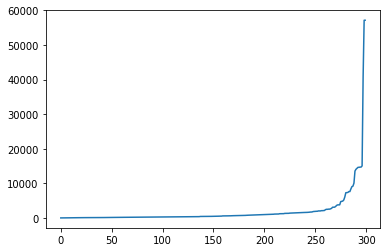

In [137]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=28)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

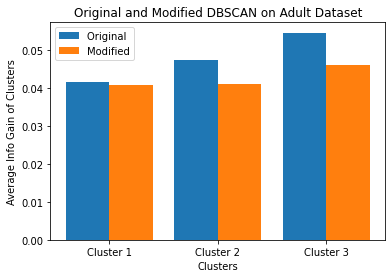

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Cluster 1','Cluster 2','Cluster 3']
Ygirls = [0.0416,0.0475,0.0546]
Zboys = [0.0409,0.041,0.0461]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Original ')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Modified')
  
plt.xticks(X_axis, X)
plt.xlabel("Clusters")
plt.ylabel("Average Info Gain of Clusters")
plt.title("Original and Modified DBSCAN on Adult Dataset")
plt.legend()
plt.show()